# Bootcamp <span style="color:#8D35FF">2023</span> - <span style="color:#8D35FF">regresja</span>

In [1]:
# pakiety
import pandas as pd
import matplotlib.pyplot as plt

# dane
import statsmodels.api as sm

In [2]:
# wczytywanie danych
gas = sm.datasets.get_rdataset("attitude", "datasets", cache=True).data
df = pd.DataFrame(gas)

## <span style="color:#8D35FF">Wizualizacja</span>

In [193]:
# dane
df.head()

,rating,complaints,privileges,learning,raises,critical,advance
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rating      30 non-null     int64
 1   complaints  30 non-null     int64
 2   privileges  30 non-null     int64
 3   learning    30 non-null     int64
 4   raises      30 non-null     int64
 5   critical    30 non-null     int64
 6   advance     30 non-null     int64
dtypes: int64(7)
memory usage: 1.8 KB


In [195]:
df.describe().round(2)

,rating,complaints,privileges,learning,raises,critical,advance
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,64.63,66.60,53.13,56.37,64.63,74.77,42.93
std,12.17,13.31,12.24,11.74,10.40,9.89,10.29
min,40.00,37.00,30.00,34.00,43.00,49.00,25.00
25%,58.75,58.50,45.00,47.00,58.25,69.25,35.00
50%,65.50,65.00,51.50,56.50,63.50,77.50,41.00
75%,71.75,77.00,62.50,66.75,71.00,80.00,47.75
max,85.00,90.00,83.00,75.00,88.00,92.00,72.00


<span style="color:#8D35FF">Korelacja</span> między zmiennymi

<AxesSubplot: >

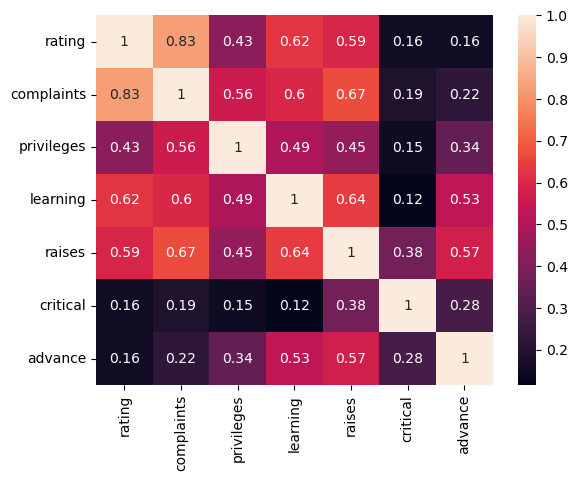

In [196]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

Wybór cechy, którą będziemy przwidywać (<span style="color:#8D35FF">zmiennej zależnej</span> *ang. <span style="color:#8D35FF">target</span>*) i cech za pomocą których będziemy przewidywać (<span style="color:#8D35FF">zmiennych niezależnych</span> *ang. <span style="color:#8D35FF">predictors</span>*)

In [197]:
target = 'rating'
predictors = [col for col in df.columns.to_list() if col != target]

Wykresy <span style="color:#8D35FF">ramka-wąsy</span> (*ang. <span style="color:#8D35FF">boxplot</span>*)

In [198]:
def boxplots(df, p):
    fig, axis = plt.subplots(2, 3, figsize=[20, 10])
    idx=0;
    axis=axis.flatten()
    for predictor in p:
        sns.boxplot(y=predictor, data=df[[predictor]], ax=axis[idx])
        idx+=1
            
    # plt.tight_layout()
    plt.show()

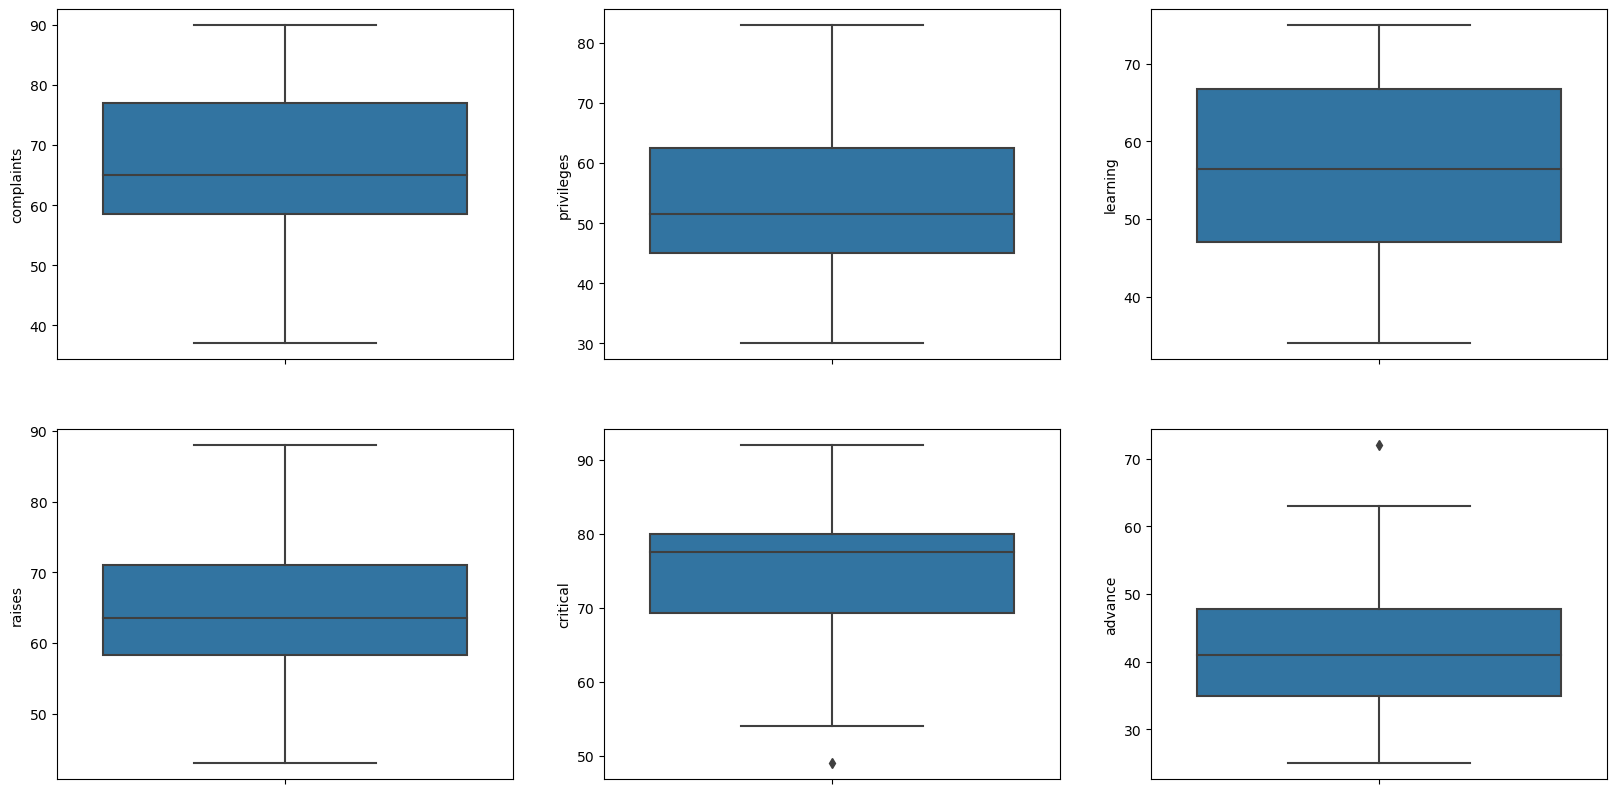

In [199]:
boxplots(df, predictors)

Usuwanie <span style="color:#8D35FF">obserwacji odstających</span> (*ang. <span style="color:#8D35FF">outliers</span>*)

In [218]:
df2 = df
for col in predictors:
    mean = df2[col].mean()
    sd = df2[col].std()
    df2 = df2[(df2[col] <= mean+(2*sd))]

In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rating      27 non-null     int64
 1   complaints  27 non-null     int64
 2   privileges  27 non-null     int64
 3   learning    27 non-null     int64
 4   raises      27 non-null     int64
 5   critical    27 non-null     int64
 6   advance     27 non-null     int64
dtypes: int64(7)
memory usage: 2.7 KB


In [222]:
df[df.isin(df2).all(axis=1)==False]

,rating,complaints,privileges,learning,raises,critical,advance
13,68,83,83,45,59,77,35
16,74,85,64,69,79,79,63
25,66,77,66,63,88,76,72


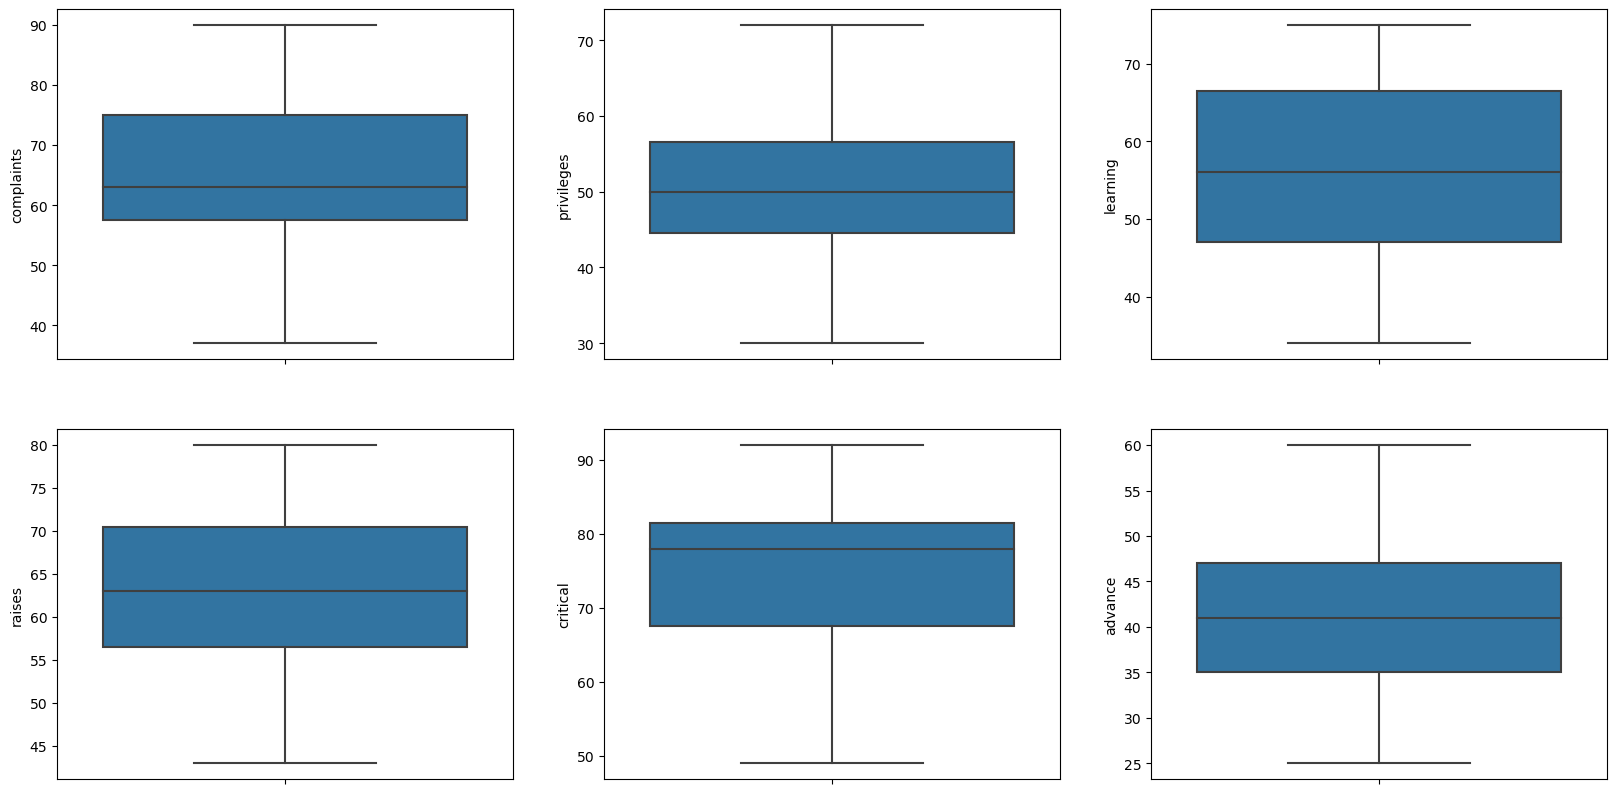

In [223]:
boxplots(df2, predictors)

Zależności pomiędzy <span style="color:#8D35FF">zmienną objaśnianą</span> (*ang. <span style="color:#8D35FF">target</span>*), a <span style="color:#8D35FF">zmiennymi objaśniającymi</span> (*ang. <span style="color:#8D35FF">predictors</span>*)

In [224]:
def dependences(data, tg, pred):
    fig, axis = plt.subplots(2, 3, figsize=[20, 10])
    idx=0;
    axis=axis.flatten()
    for p in pred:
        data.plot(y=tg, x=p, kind="scatter", ax=axis[idx])
        idx+=1
            
    plt.tight_layout()
    plt.show()

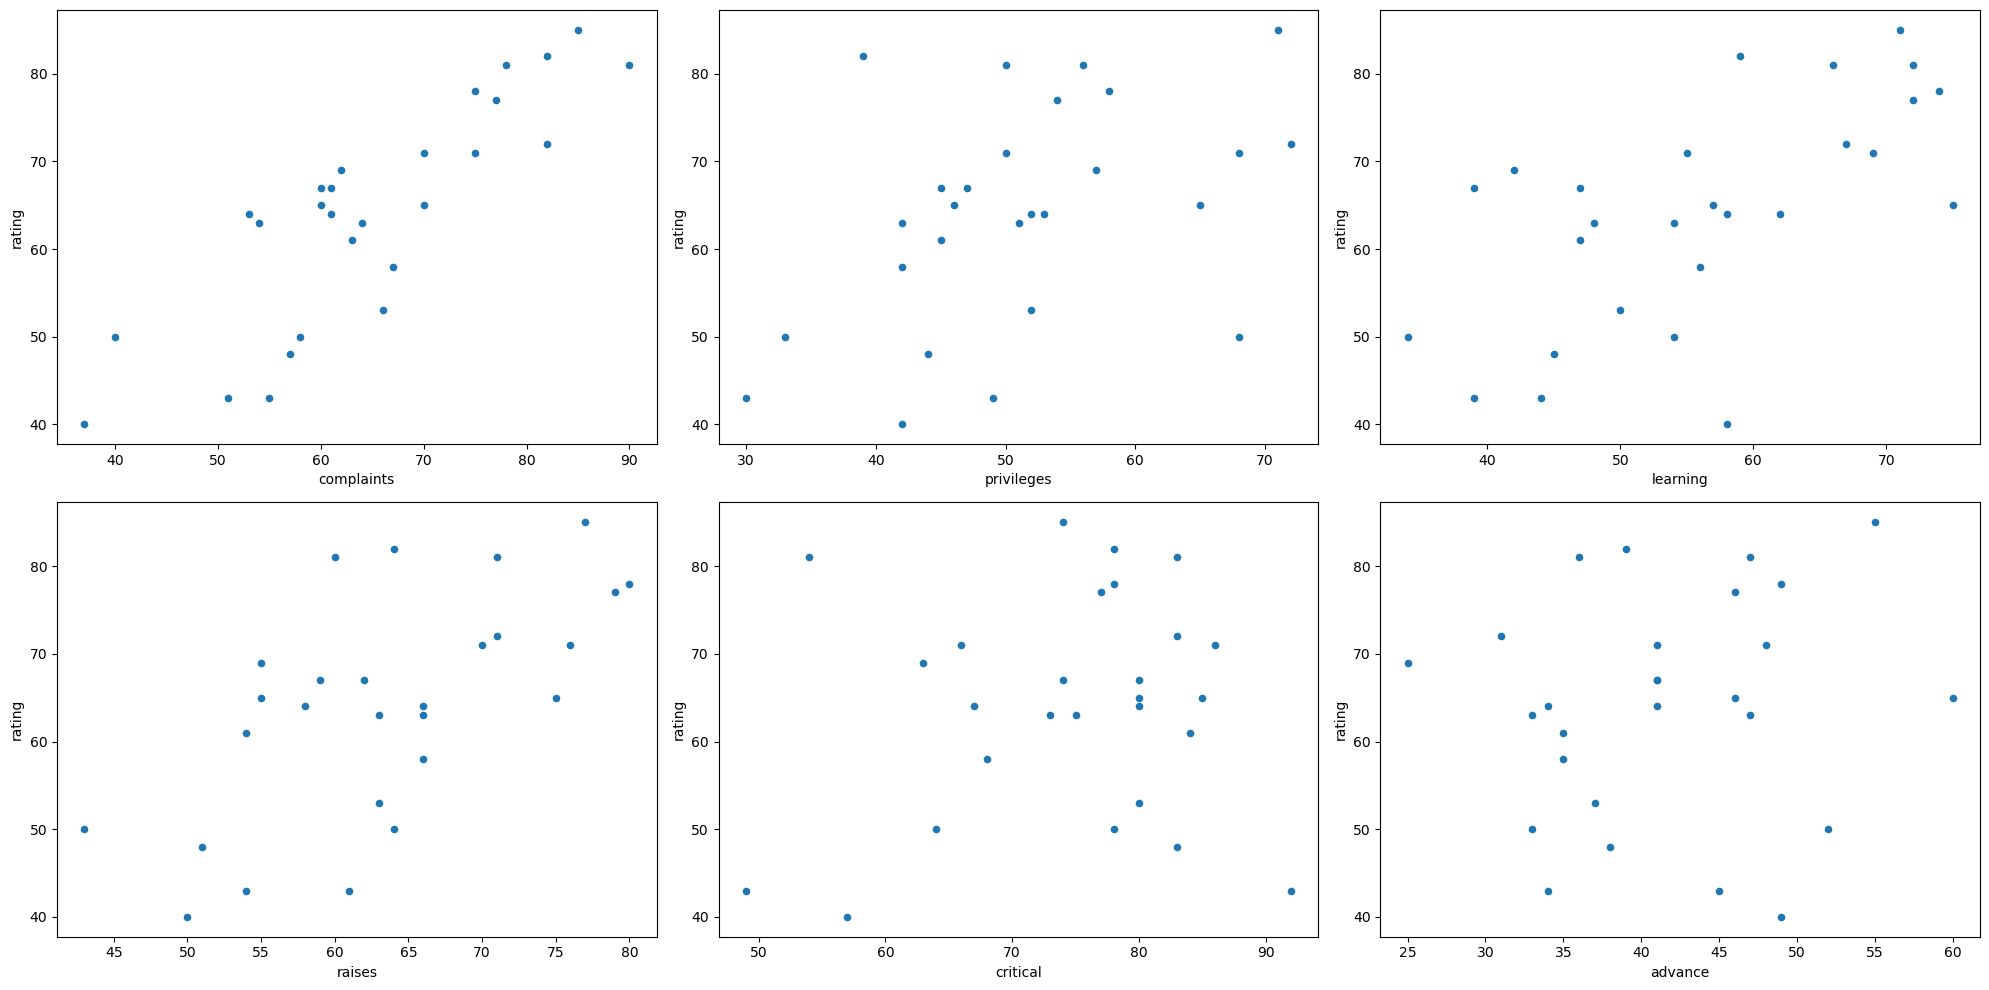

In [225]:
dependences(df2,target,predictors)

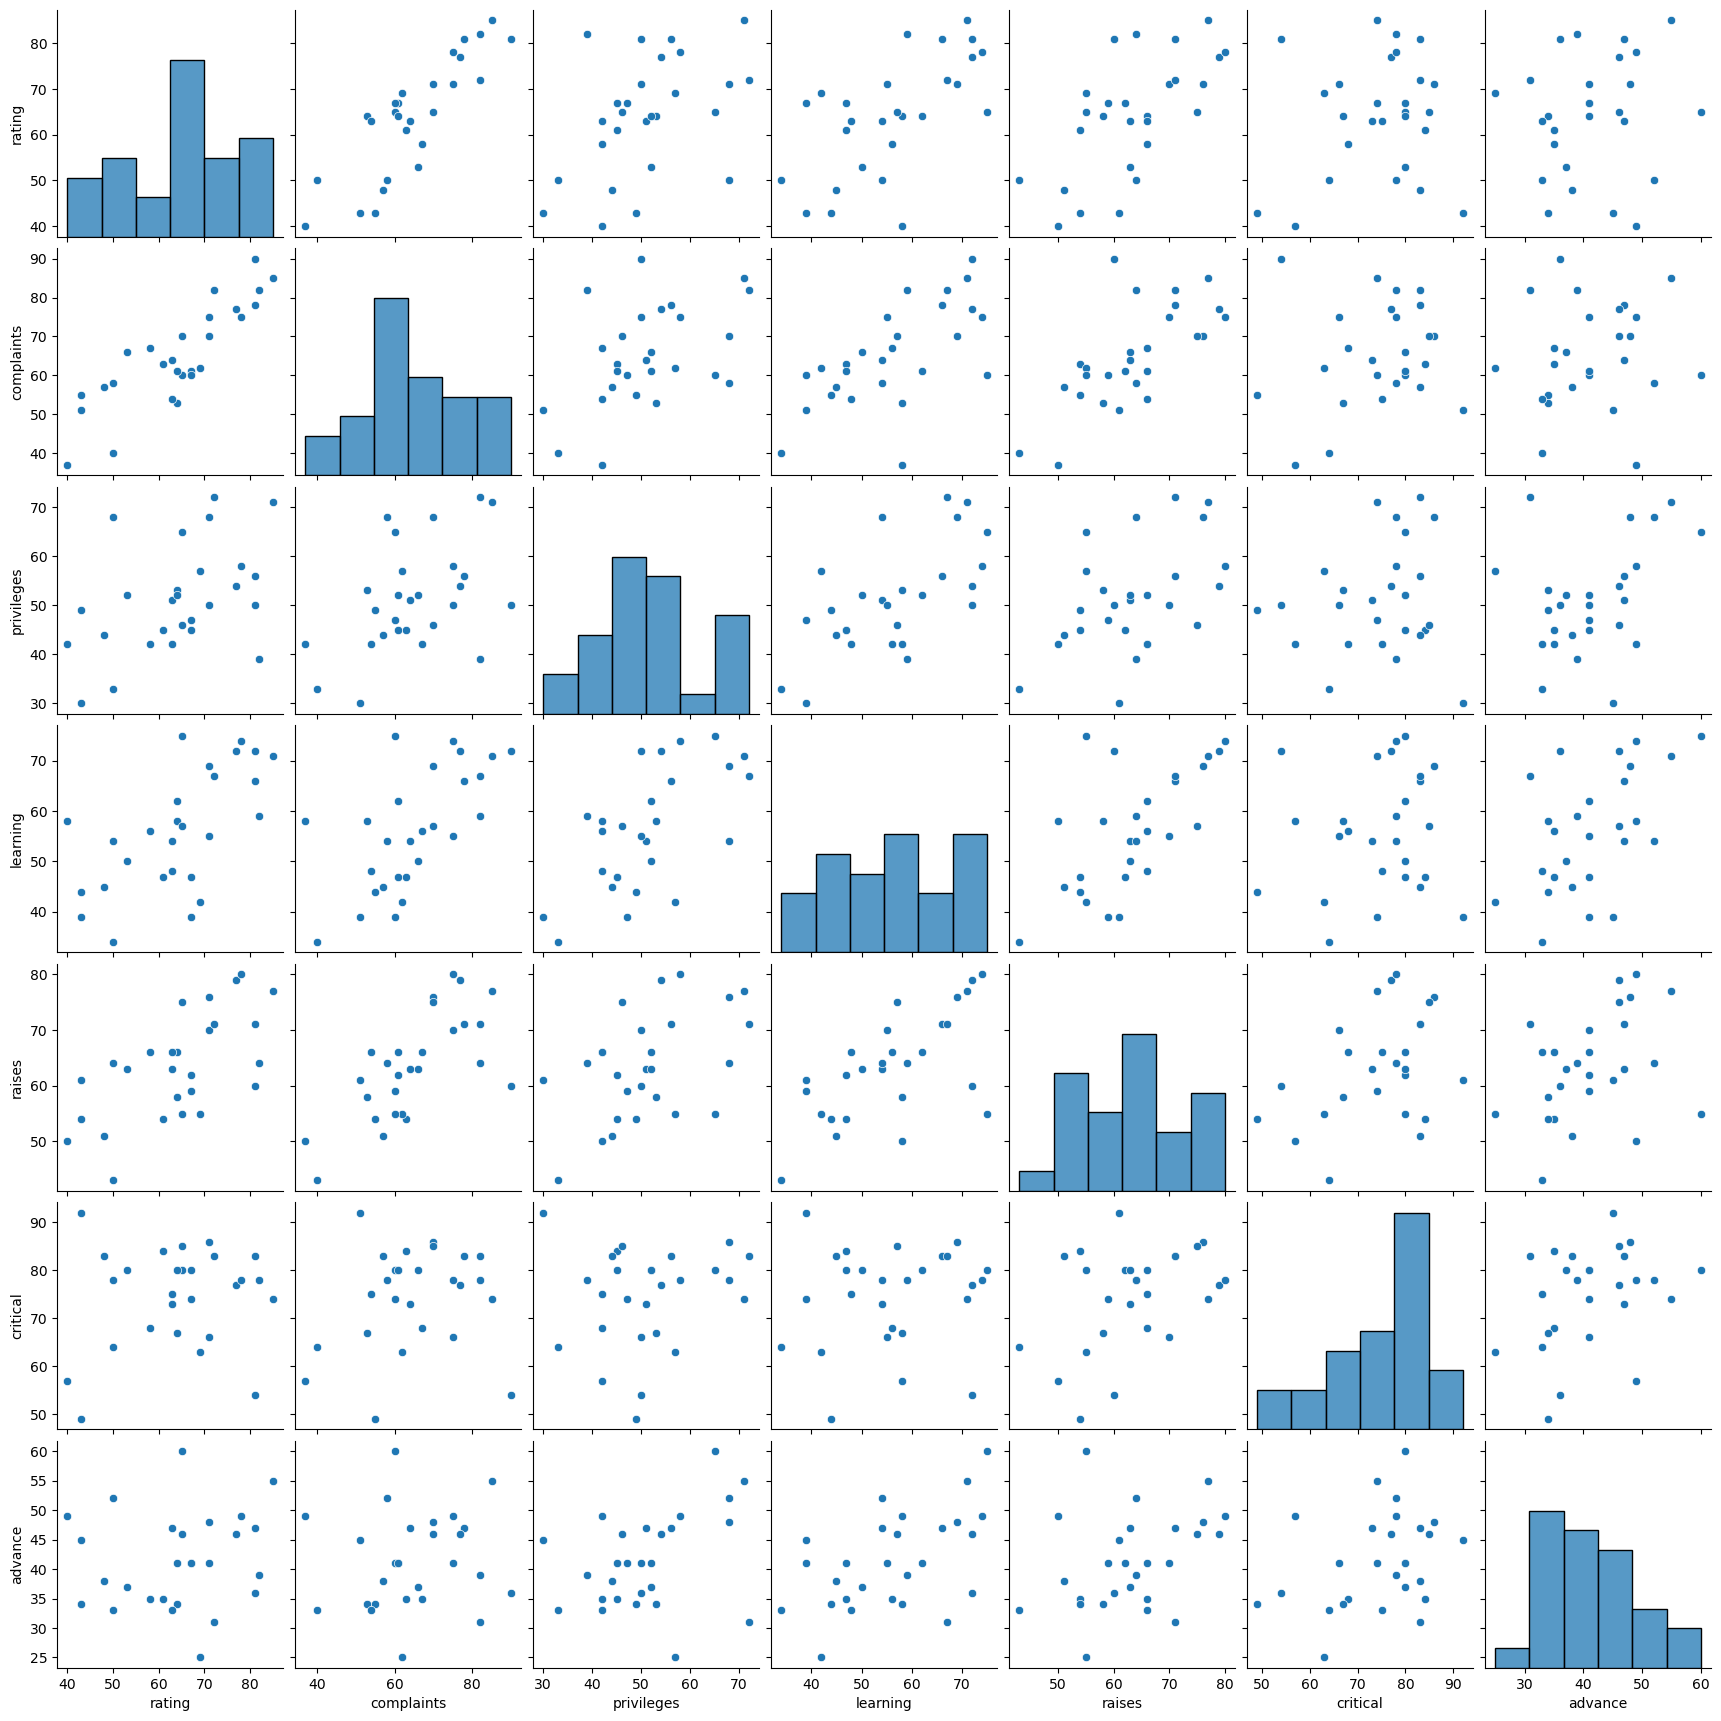

In [226]:
sns.pairplot(df2)

## <span style="color:#8D35FF">Regresja liniowa</span>

### <span style="color:#8D35FF">Preprocessing</span>

Podział na zbiór <span style="color:#8D35FF">testowy</span> i <span style="color:#8D35FF">treningowy</span>

In [227]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df2, test_size = 0.15, random_state=7)

<span style="color:#8D35FF">Standaryzacja predyktorów</span>

In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train[predictors])


train_std = scaler.transform(df_train[predictors])

df_train_std = pd.DataFrame(train_std, index=df_train.index, columns=predictors)
df_train_std.insert(loc=0, column = target, value = df_train[target])


test_std = scaler.transform(df_test[predictors])

df_test_std = pd.DataFrame(test_std, index=df_test.index, columns=predictors)
df_test_std.insert(loc=0, column = target, value = df_test[target])

Model <span style="color:#8D35FF">regresji liniowej</span> budowany metodą <span style="color:#8D35FF">najmniejszych kwadratów</span> (*ang. <span style="color:#8D35FF">OLS</span> - <span style="color:#8D35FF">Ordinary least Squares</span>*)

In [230]:
from statsmodels.api import OLS

def build_linear_regression_model(df_train, target_column):
    X = df_train.drop(target_column, axis=1)
    y = df_train[target_column]
    x = sm.add_constant(X)
    model = OLS(y,x).fit()
    return model

In [231]:
lm = build_linear_regression_model(df_train_std, target)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     9.410
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           0.000221
Time:                        13:15:04   Log-Likelihood:                -69.666
No. Observations:                  22   AIC:                             153.3
Df Residuals:                      15   BIC:                             161.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3182      1.482     44.062      0.0

<span style="color:#8D35FF">Predykcja</span> i <span style="color:#8D35FF">MSE</span> 
<!-- do zmiany -->

In [232]:
pred = lm.predict(sm.add_constant(df_test_std[predictors]))

In [233]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(df_test_std[target],pred)
MSE


127.40027866848504

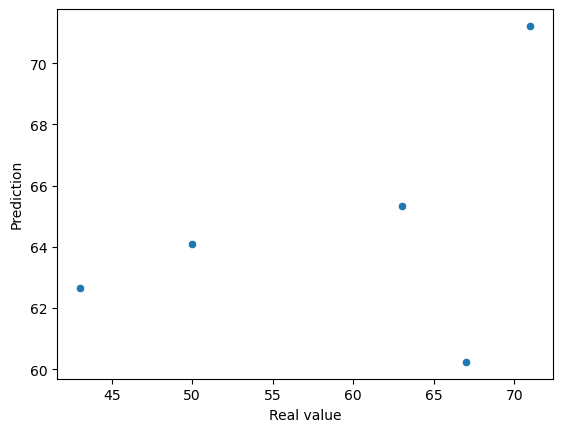

In [234]:
plt.figure()
sns.scatterplot(x = df_test_std[target], y = pred)
plt.xlabel("Real value")
plt.ylabel("Prediction")
plt.show()

### <span style="color:#8D35FF">Regresja wielomianowa</span>

In [235]:
from sklearn.preprocessing import PolynomialFeatures

Degree: 1, Features: 7
Degree: 2, Features: 28
Degree: 3, Features: 84
Degree: 4, Features: 210
Degree: 5, Features: 462


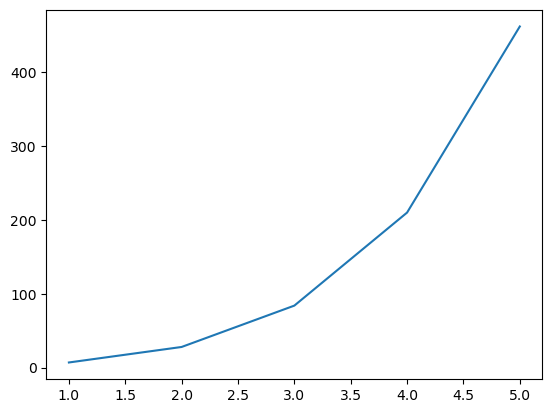

In [236]:
# trans = PolynomialFeatures(degree=3)
# data = trans.fit_transform(df_train_std[predictors])

num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
 # create transform
 trans = PolynomialFeatures(degree=d)
 # fit and transform
 data = trans.fit_transform(df_train_std[predictors])
 # record number of features
 num_features.append(data.shape[1])
 # summarize
 print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
plt.plot(degress, num_features)
plt.show()